## Import necessary libraries

In [1]:
import numpy as np
import tensorflow as tf
import keras
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input, Dense

## Build an example as simple model with 3 hidden layers

In [2]:
visible = Input(shape=(10,))
hidden1 = Dense(10, activation='relu')(visible)
hidden2 = Dense(10, activation='relu')(hidden1)
hidden3 = Dense(10, activation='relu')(hidden2)
output = Dense(10, activation='relu')(hidden3)

model = Model(inputs=visible, outputs=output)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
Total params: 440 (1.72 KB)
Trainable params: 440 (1.72 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


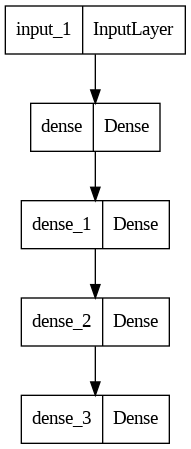

In [3]:
plot_model(model)

## Load the MNIST dataset

In [4]:
from keras.datasets import mnist

(x_train, y_train), (x_val, y_val) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


## Convert answers to binary matrix

In [5]:
y_train_oh = keras.utils.to_categorical(y_train, 10)

y_val_oh = keras.utils.to_categorical(y_val, 10)

## Build a model with a single hidden layer

In [6]:
keras.backend.clear_session()
model = keras.Sequential()
model.add(Dense(128, input_dim=784, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

## Set metrics like crossentropy loss, adam optimizer and accuracy

In [7]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

## Normalizing an input by setting its values from -0.5 to 0.5

In [10]:
x_train_float = x_train.astype(np.float64) / 255 - 0.5
x_val_float = x_val.astype(np.float64) / 255 - 0.5

## Training the model

In [11]:
model.fit(
    x_train_float.reshape(-1, 28*28),
    y_train_oh,
    batch_size=64,
    epochs=10,
    validation_data=(x_val_float.reshape(-1, 28*28), y_val_oh)
)

Epoch 1/10
938/938 [==============================] - 6s 6ms/step - loss: 0.2190 - accuracy: 0.9179 - val_loss: 0.3452 - val_accuracy: 0.8819
Epoch 2/10
938/938 [==============================] - 4s 5ms/step - loss: 0.2071 - accuracy: 0.9213 - val_loss: 0.3905 - val_accuracy: 0.8727
Epoch 3/10
938/938 [==============================] - 8s 9ms/step - loss: 0.2008 - accuracy: 0.9239 - val_loss: 0.3304 - val_accuracy: 0.8870
Epoch 4/10
938/938 [==============================] - 5s 5ms/step - loss: 0.1955 - accuracy: 0.9269 - val_loss: 0.3471 - val_accuracy: 0.8853
Epoch 5/10
938/938 [==============================] - 5s 5ms/step - loss: 0.1877 - accuracy: 0.9291 - val_loss: 0.3425 - val_accuracy: 0.8874
Epoch 6/10
938/938 [==============================] - 6s 6ms/step - loss: 0.1769 - accuracy: 0.9333 - val_loss: 0.3832 - val_accuracy: 0.8815
Epoch 7/10
938/938 [==============================] - 4s 5ms/step - loss: 0.1721 - accuracy: 0.9337 - val_loss: 0.3488 - val_accuracy: 0.8904
Epoch 